In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib

In [ ]:
data = pd.DataFrame()
for file in os.listdir():
  if file.endswith(".csv"):
    temp_df = pd.read_csv(file)
    subject_id = file[:-4]
    temp_df["Subject"] = subject_id

    data = pd.concat([data, temp_df])

In [ ]:
data.head(20)

,Subject,Event.Nr,CDA.nSCR,CDA.Latency,CDA.AmpSum,CDA.SCR,CDA.ISCR,CDA.PhasicMax,CDA.Tonic,TTP.nSCR,TTP.Latency,TTP.AmpSum,Global.Mean,Global.MaxDeflection,Event.NID,Event.Name
0,152,1,0,NaN,0.0000,0.0006,0.0448,0.1037,6.6380,0,NaN,0.0000,6.6723,0.0184,90,90
1,152,2,2,0.1467,0.1611,0.0049,0.3887,0.4272,7.1246,0,NaN,0.0000,7.2164,0.1982,95,95
2,152,3,1,0.3283,0.0277,0.0010,0.0770,0.2172,7.2157,2,0.2033,0.1773,7.2904,0.0166,40,40
3,152,4,2,0.5013,0.1415,0.0028,0.2222,0.5300,7.3774,1,1.5262,0.1389,7.4503,0.0253,41,41
4,152,5,1,0.7997,0.0446,0.0063,0.5046,0.7259,7.4018,1,0.4747,0.2984,7.4698,0.0787,42,42
5,152,6,1,1.9177,0.4583,0.0121,0.9660,1.0946,7.3375,1,1.0928,0.2768,7.6530,0.0873,43,43
6,152,7,1,0.5572,0.0403,0.0041,0.3275,1.1469,7.8352,0,NaN,0.0000,7.9051,0.1795,44,44
7,152,8,4,0.0248,0.5083,0.0123,0.9815,0.5561,8.3309,0,NaN,0.0000,9.1853,0.0000,45,45
8,152,9,1,1.1222,0.0228,0.0010,0.0799,0.1054,10.6131,0,NaN,0.0000,10.6266,0.0006,46,46
9,152,10,3,0.0593,0.0521,0.0019,0.1532,0.1180,9.9623,0,NaN,0.0000,10.0389,0.0004,60,60


In [ ]:
grouped = data.groupby(['Subject', "Event.NID"])
grouped["CDA.nSCR", "CDA.PhasicMax", "Event.NID"].mean()

<ipython-input-53-47616d52302f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped["CDA.nSCR", "CDA.PhasicMax", "Event.NID"].mean()


CDA.nSCR  CDA.PhasicMax  Event.NID
Subject Event.NID                                    
115     20              0.9        0.09817       20.0
        21              1.1        0.05651       21.0
        22              1.3        0.05787       22.0
        23              1.0        0.04919       23.0
        24              1.0        0.05953       24.0
...                     ...            ...        ...
54      86              0.5        0.08964       86.0
        90              1.0        0.22520       90.0
        91              0.0        0.00900       91.0
        92              1.0        0.43840       92.0
        95              0.8        0.12380       95.0

[412 rows x 3 columns]

In [ ]:
data["Condition"] = np.select([
        (data["Event.NID"] >= 20) & (data["Event.NID"] <= 26),
        (data["Event.NID"] >= 40) & (data["Event.NID"] <= 46),
        (data["Event.NID"] >= 60) & (data["Event.NID"] <= 66),
        (data["Event.NID"] >= 80) & (data["Event.NID"] <= 86)],
        ["T2", "T4", "T6", "T8"], "None"
)

data["CDA.Latency"] = data["CDA.Latency"].astype(float)
data["CDA.AmpSum"] = data["CDA.AmpSum"].astype(float)
data["CDA.SCR"] = data["CDA.SCR"].astype(float)

In [ ]:
data['Event'] = np.select([
    data['Event.NID'].isin([20,40,60,80]),
    data['Event.NID'].isin([21,41,61,81]),
    data['Event.NID'].isin([22,42,62,82]),
    data['Event.NID'].isin([23,43,63,83]),
    data['Event.NID'].isin([24,44,64,84]),
    data['Event.NID'].isin([25,45,65,85]),
    data['Event.NID'].isin([26,46,66,86])],
    ["square1", "square2", "square3", "square4", "square5", "heatPulse", "painRating"], "anticipation"
)

In [ ]:
data['GlobalMinusTonic'] = data["Global.Mean"] - data["CDA.Tonic"]
data = data[data["Condition"] != "None"]

<ipython-input-57-4c1290c2bee2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_check["Condition"] = pd.Categorical(data_to_check["Condition"], categories=condition_order, ordered=True)


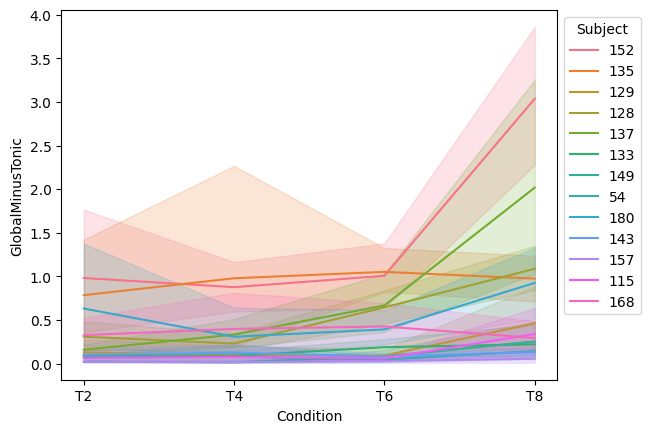

In [ ]:
condition_order = ["T2", "T4", "T6", "T8"]

data_to_check = data[data["Event"] == "heatPulse"]
data_to_check["Condition"] = pd.Categorical(data_to_check["Condition"], categories=condition_order, ordered=True)
ax = sns.lineplot(data=data_to_check, x="Condition", y="GlobalMinusTonic", hue="Subject")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<ipython-input-66-ac5608cb82dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_check["Condition"] = pd.Categorical(data_to_check["Condition"], categories=condition_order, ordered=True)


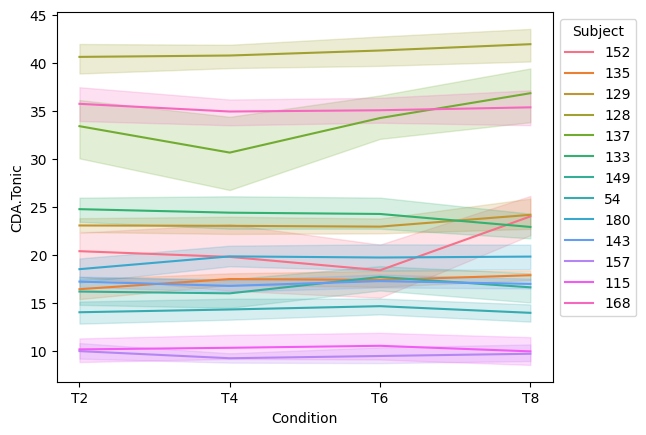

In [ ]:
data_to_check = data[data["Event"] == "heatPulse"]
data_to_check["Condition"] = pd.Categorical(data_to_check["Condition"], categories=condition_order, ordered=True)
ax = sns.lineplot(data=data_to_check, x="Condition", y="CDA.Tonic", hue="Subject")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<ipython-input-69-e8b801899cd2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_check["Condition"] = pd.Categorical(data_to_check["Condition"], categories=condition_order, ordered=True)


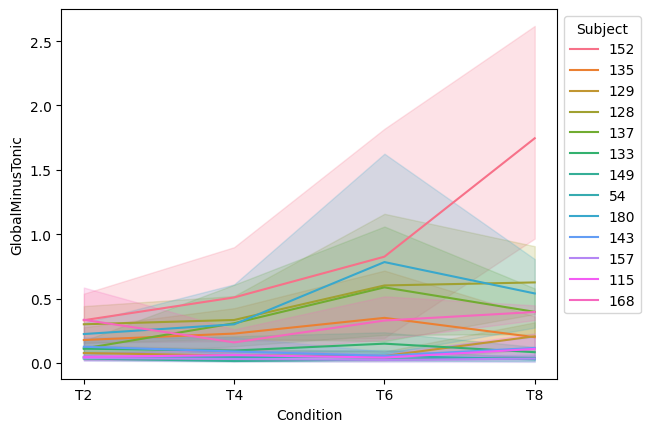

In [ ]:
data_to_check = data[data["Event"] == "square5"]
data_to_check["Condition"] = pd.Categorical(data_to_check["Condition"], categories=condition_order, ordered=True)
ax = sns.lineplot(data=data_to_check, x="Condition", y="GlobalMinusTonic", hue="Subject")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<ipython-input-70-241ddc5636d8>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=data_to_check, x="Condition", y="GlobalMinusTonic", hue="Subject", ci=None, estimator=None)


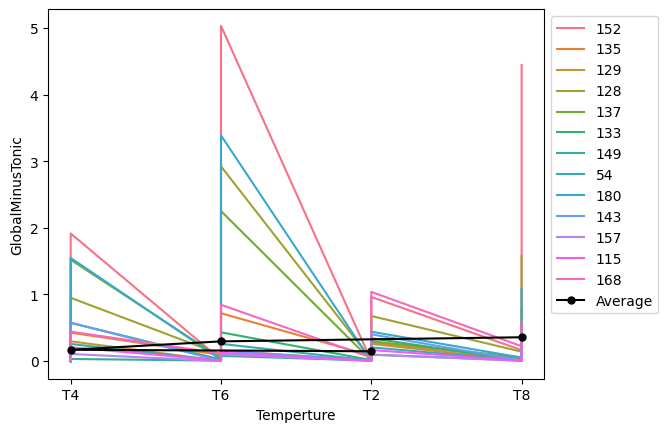

In [ ]:
#ניסיון למצוא ממוצע, להתעלם ולתקן

import matplotlib.pyplot as plt

data_to_check = data[data["Event"] == "square5"]

ax = sns.lineplot(data=data_to_check, x="Condition", y="GlobalMinusTonic", hue="Subject", ci=None, estimator=None)

# mean values for each condition
mean_values = data_to_check.groupby("Condition")["GlobalMinusTonic"].mean()

# average line
plt.plot(mean_values.index, mean_values.values, marker='o', markersize=5, label='Average', color='black')

plt.legend()
plt.xlabel("Temperture")
plt.ylabel("GlobalMinusTonic")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()